<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Briam Pavel Aguirre Moisés  <br>
Fecha: 28/05/2023

# Importación de librerias necesarias

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# Parte II. Clasificación

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [24]:
#Código para cargar el Dataset
#url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df = pd.read_csv("train.csv")

## Descripción de la fuente del Dataset

La fuente de datos fue extraída del siguiente sitio web:
https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation 

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

**Descripción del problema:** En este caso el equipo de ventas de una empresa de automóviles ha clasificado a sus clientes en cinco segmentos. La empresa quiere ingresar nuevos productos al mercado y en base a una investigación han deducido que el mercado se mantiene. Han identificado nuevos clientes potenciales y quieren clasificarlos.

**Tipo de problema:** Problema de clasificación.

**Variable objetivo:** Segmentation.

**Variables de entrada:** ID, Gender, Ever_Married, Age, Graduated, Profession, Work Experience, Spending Score, Family Size, Var_1.

**Utilidad de la solución:** El modelo podrá clasificar a los nuevos clientes potenciales entre los segmentos A,B,C,D,E.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [25]:
# Número de instancias en total
df.shape[0]

8068

**Número de instancias en total** Se tiene un total de 8068 instancias

In [26]:
# Número de atributos de entrada
df.shape[1]-1

11

**Número de atributos de entrada** Son 11 atributos de entrada, se detalla a continuación su significado y tipo

- **ID:** Código único (Categórica nominal).
- **Gender:** Género (Categórica nominal).
- **Ever_Married:** Estado matrimonial (Categórica nominal).
- **Age:** Edad (Numérica continua).
- **Graduated:** Graduado o no (Categórica nominal).
- **Profession:** Profesión (Categórica nominal).
- **Work Experience:** Experiencia trabajando en años (Numérica discreta).
- **Spending Score:** Puntaje de gasto (Categórica ordinal).
- **Family Size:** Cantidad de miembros en la familia (Numérica discreta).
- **Var_1:** Categoría anónima (Categórica nominal).

In [27]:
# Número de clases de la variable objetivo
df["Segmentation"].unique()

array(['D', 'A', 'B', 'C', 'E'], dtype=object)

**Número de clases del target:** Existen cinco clases en la variable Segmentación, cada clase representa una segmentación distinta y el valor que toma es de tipo categórico.

In [28]:
# Número de instancias pertenecientes a cada clase en el target
pd.value_counts(df["Segmentation"])

C    1970
B    1858
D    1617
A    1418
E    1205
Name: Segmentation, dtype: int64

**Número de instancias pertenecientes al target:** Se muestra la cantidad de instancias por clase del target, siendo la segmentación C la que más instancias tiene y la E la de menor. 

In [29]:
# Estadísticas de los atributos en relación con la variable objetivo
pd.pivot_table(df, index = "Segmentation", aggfunc = "mean")

<ipython-input-29-9d1967c31d33>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pd.pivot_table(df, index = "Segmentation", aggfunc = "mean")


,Age,Family_Size,ID,Unnamed: 0,Work_Experience
Segmentation,,,,,
A,36.282087,2.540839,463535.481664,3942.080395,3.354988
B,48.200215,2.696970,463520.253498,4070.311625,2.378151
C,49.144162,2.974559,463576.043655,4081.951269,2.240771
D,25.490414,3.586755,463472.103896,4035.824985,3.101541
E,59.464730,2.268032,463200.963485,4001.988382,2.243973


In [30]:
pd.pivot_table(df, index = "Segmentation", aggfunc = lambda x: x.mode().iat[0])

,Age,Ever_Married,Family_Size,Gender,Graduated,ID,Profession,Spending_Score,Unnamed: 0,Var_1,Work_Experience
Segmentation,,,,,,,,,,,
A,35,No,2.0,Male,Yes,458993,Artist,Low,1,Cat_6,0.0
B,43,Yes,2.0,Male,Yes,458989,Artist,Low,2,Cat_6,1.0
C,50,Yes,2.0,Male,Yes,458982,Artist,Average,5,Cat_6,1.0
D,22,No,4.0,Male,No,458985,Healthcare,Low,0,Cat_6,0.0
E,53,Yes,1.0,Male,Yes,458990,Lawyer,Low,8,Cat_6,1.0


**Estadísticas de los atributos en relación a la variable objetivo:** 
  - Los clientes del segmento E son en promedio los mayores y los del grupo D los menores
  - El tamaño de la familia es mayor en el segmento D y menor en el segmento E
  - En los primeros tres segmentos la mayoría de los clientes son Artist, en el segmento D son Healthcare y en el segmento E son Lawyer.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [31]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2

Eliminamos de nuesto dataset las variables ID por no contener información relevante y Var_1 por ser una variable desconocida 

In [32]:
df = df.drop(columns = ["ID","Var_1","Unnamed: 0"])
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


Imputamos los valores missings 

In [33]:
pd.pivot_table(df, index = "Segmentation", aggfunc=lambda x: x.mode().iat[0])

,Age,Ever_Married,Family_Size,Gender,Graduated,Profession,Spending_Score,Work_Experience
Segmentation,,,,,,,,
A,35,No,2.0,Male,Yes,Artist,Low,0.0
B,43,Yes,2.0,Male,Yes,Artist,Low,1.0
C,50,Yes,2.0,Male,Yes,Artist,Average,1.0
D,22,No,4.0,Male,No,Healthcare,Low,0.0
E,53,Yes,1.0,Male,Yes,Lawyer,Low,1.0


In [34]:
df["Ever_Married"] = df.groupby(["Segmentation"])["Ever_Married"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Graduated"] = df.groupby(["Segmentation"])["Graduated"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Profession"] = df.groupby(["Segmentation"])["Profession"].apply(lambda x: x.fillna(x.mode().iat[0]))
df["Family_Size"] = df.groupby(["Segmentation"])["Family_Size"].apply(lambda x: x.fillna(x.mean()))
df["Work_Experience"] = df["Work_Experience"].replace(np.nan,1)

<ipython-input-34-cbb45774b644>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["Ever_Married"] = df.groupby(["Segmentation"])["Ever_Married"].apply(lambda x: x.fillna(x.mode().iat[0]))
<ipython-input-34-cbb45774b644>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["Graduated"] = df.grou

Discretizamos las variables cuantitativas

In [35]:
df["Age"] = pd.cut(x = df["Age"], bins = [16,18,26,59,df["Age"].max()] , labels = ["Adolescencia","Juventud","Adultez","Vejez"])
df["Work_Experience"] = pd.cut(x = df["Work_Experience"], bins = [-1,2,6,df["Work_Experience"].max()], labels = ["Junior","Semi-Senior","Senior"])
df["Family_Size"] = pd.cut(x = df["Family_Size"], bins = [0,3,6,df["Family_Size"].max()] , labels = ["Pequeña","Mediana","Grande"])

Hacemos uso de variables dummies para nuestras variables categóricas nominales.

In [36]:
df_new = pd.get_dummies(df, columns = ["Gender","Ever_Married","Graduated","Profession"], drop_first = True)

Hacemos uso del One Hot Encoder para nuestras variables categóricas ordinales

In [37]:
a = ["Low","Average","High"]
b = ["A","B","C","D","E"]
c = ["Adolescencia","Juventud","Adultez","Vejez"]
d = ["Junior","Semi-Senior","Senior"]
e = ["Pequeña","Mediana","Grande"]
encoder = OrdinalEncoder(categories = [a,b,c,d,e])
df_new_encoder = encoder.fit_transform(df_new[["Spending_Score","Segmentation","Age","Work_Experience","Family_Size"]])
df_new_encoder = pd.DataFrame(df_new_encoder,columns = ["Spending_Score","Segmentation","Age","Work_Experience","Family_Size"])

In [38]:
df_new_encoder = df_new_encoder.reset_index()
df_new = df_new.drop(columns = ["Age","Work_Experience","Spending_Score","Family_Size","Segmentation"]).reset_index()

In [39]:
df_new = pd.merge(df_new,df_new_encoder, on = "index" ).drop(columns = ["index"])
df_new.head(5)

,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score,Segmentation,Age,Work_Experience,Family_Size
0,1,0,0,0,0,0,0,1,0,0,0,0.0,3.0,1.0,0.0,1.0
1,0,1,1,0,1,0,0,0,0,0,0,1.0,0.0,2.0,0.0,0.0
2,0,1,1,0,1,0,0,0,0,0,0,0.0,1.0,3.0,0.0,0.0
3,1,1,1,0,0,0,0,0,0,1,0,2.0,1.0,3.0,0.0,0.0
4,0,1,1,0,0,1,0,0,0,0,0,2.0,0.0,2.0,0.0,1.0


**Prueba chi2:** Se realiza la prueba de chi cuadrado para calcular la importancia de cada variable

In [40]:
X_chi = df_new.drop(columns = ["Segmentation"], axis = 1)
y_chi = df_new["Segmentation"]

In [41]:
chi_scores = chi2(X_chi, y_chi)

<Axes: >

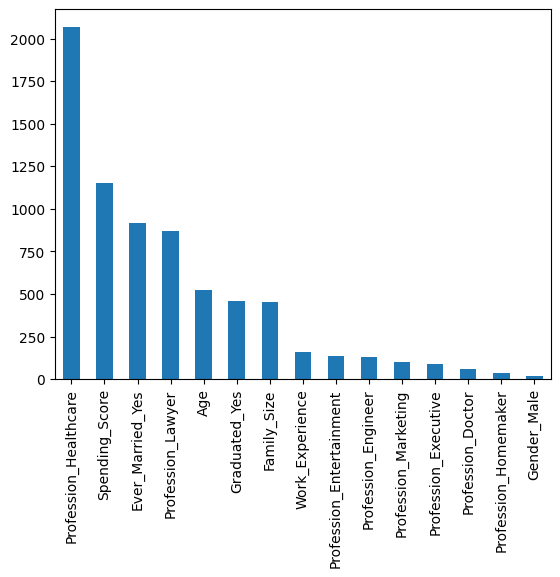

In [42]:
chi_values = pd.Series(chi_scores[0], index = X_chi.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

Después de haber realizado las pruebas de chi cuadrado, se ha optado por no considerar todas las variables sino las 8 más relevantes.

In [43]:
df_new = df_new[["Profession_Healthcare","Spending_Score","Ever_Married_Yes","Profession_Lawyer","Age","Graduated_Yes","Family_Size","Segmentation"]]
df_new.head(5)

,Profession_Healthcare,Spending_Score,Ever_Married_Yes,Profession_Lawyer,Age,Graduated_Yes,Family_Size,Segmentation
0,1,0.0,0,0,1.0,0,1.0,3.0
1,0,1.0,1,0,2.0,1,0.0,0.0
2,0,0.0,1,0,3.0,1,0.0,1.0
3,0,2.0,1,1,3.0,1,0.0,1.0
4,0,2.0,1,0,2.0,1,1.0,0.0


## División del dataset en datos de entrenamiento y datos de test 

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score

In [45]:
X = df_new[df_new.columns[:-1]]
y = df_new["Segmentation"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

In [47]:
# Código de la estructuración de la red
import tensorflow as tf
from tensorflow import keras

In [71]:
#Código de la inspección del modelo de red
def build_model():
  model = keras.Sequential()

  model.add(keras.layers.Dense(16, activation = "relu", input_dim = 7))
  model.add(keras.layers.Dense(8, activation = "relu"))
  model.add(keras.layers.Dense(4, activation = "relu"))
  model.add(keras.layers.Dense(5, activation = "softmax"))

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [72]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                128       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 5)                 25        
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
177/177 [==============================] - 2s 3ms/step - loss: 1.5347 - accuracy: 0.3813
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 1.4356 - accuracy: 0.4293
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 1.4002 - accuracy: 0.4316
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 1.3747 - accuracy: 0.4360
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 1.3536 - accuracy: 0.4360
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 1.3341 - accuracy: 0.4376
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 1.3111 - accuracy: 0.4525
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 1.2898 - accuracy: 0.4771
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 1.2733 - accuracy: 0.4822
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 1.2599 - accura

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [74]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

177/177 [==============================] - 1s 5ms/step
Accuracy on training data: 0.49406763911247253% 
 Error on training data: 0.5059323608875275
76/76 [==============================] - 0s 3ms/step
Accuracy on test data: 0.5010326504707336% 
 Error on test data: 0.49896734952926636


## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [58]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [59]:
#Código de ajuste del modelo de clasificación 1
model_arbol = tree.DecisionTreeClassifier(max_depth = 8, criterion = "entropy", random_state = 1)
model_arbol.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [60]:
y_arbol = model_arbol.predict(X_test)

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [84]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
from sklearn.metrics import classification_report 

In [87]:
print("Modelo de red neuronal")
print(classification_report(y_test,y_pred_classes))

Modelo de red neuronal
              precision    recall  f1-score   support

         0.0       0.37      0.56      0.45       426
         1.0       0.32      0.22      0.26       544
         2.0       0.56      0.57      0.56       607
         3.0       0.66      0.74      0.69       483
         4.0       0.61      0.43      0.50       361

    accuracy                           0.50      2421
   macro avg       0.50      0.50      0.49      2421
weighted avg       0.50      0.50      0.49      2421



In [88]:
print("Modelo de árbol de decisión")
print(classification_report(y_test,y_arbol))

Modelo de árbol de decisión
              precision    recall  f1-score   support

         0.0       0.38      0.55      0.45       426
         1.0       0.33      0.17      0.23       544
         2.0       0.55      0.62      0.58       607
         3.0       0.64      0.77      0.70       483
         4.0       0.60      0.44      0.51       361

    accuracy                           0.51      2421
   macro avg       0.50      0.51      0.49      2421
weighted avg       0.50      0.51      0.49      2421



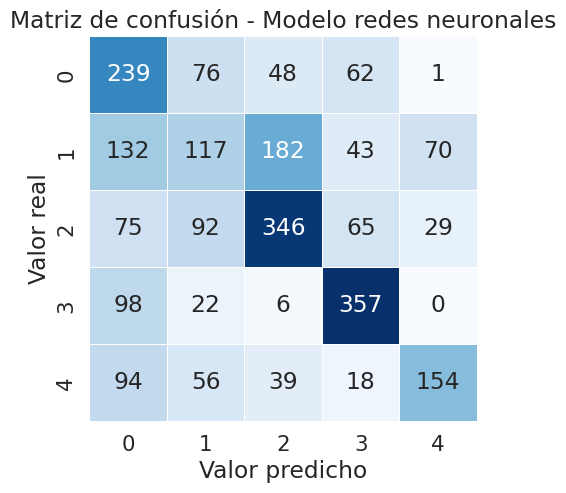

In [85]:
y_pred_classes = np.argmax(pred_test, axis = 1)
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
mlp_matrix = confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap=plt.cm.Blues,linewidth=0.5,fmt="d")
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
plt.title('Matriz de confusión - Modelo redes neuronales');

Matriz de confusión - Modelo árbol de decisión


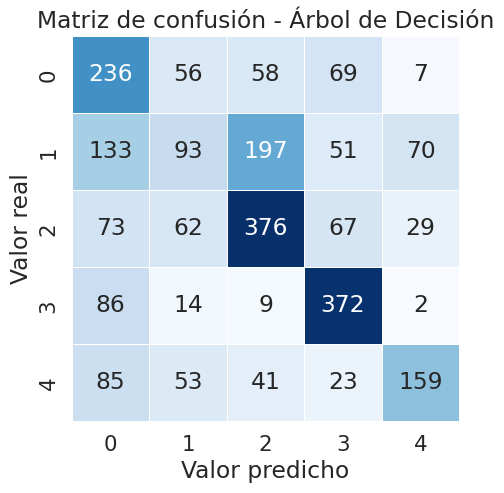

In [65]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica
print("Matriz de confusión - Modelo árbol de decisión")
mlp_matrix = confusion_matrix(y_test,y_arbol)
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(mlp_matrix,annot=True, cbar=False, cmap=plt.cm.Blues,linewidth=0.5,fmt="d")
plt.ylabel('Valor real')
plt.xlabel('Valor predicho')
plt.title('Matriz de confusión - Árbol de Decisión');

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

**Discusión de los resultados**

  - Los modelos de árbol de decisión y red neuronal tienen un poder predictivo muy parecido ya que tienen accuracy, precisión y recall muy cercanos. 

  - Ambos modelos son muy malos en predicción (No recomendable su uso) ya que tan solo aciertan el 50% de los casos, que prácticamente es lo mismo que lanzar una moneda.

- Los resultados obtenidos se pueden mejorar con una data más grande; es decir, tener más información ya que con la que se tiene no se pueden elaborar reglas que discrimen de mejor manera.